This notebook is reproducing figure 10 of the manuscript 'Multi-year simulations at kilometre scale with the Integrated
2 Forecasting System coupled to FESOM2.5/NEMOv3.4'

https://doi.org/10.5194/egusphere-2024-913

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import pickle
import pandas as pd
import cartopy.crs as ccrs

import cdo
cdo = cdo.Cdo(tempdir='/scratch/m/m300265/tmp/cdo-py') #recommended to set the tempdir


In [2]:
# Load data
with open('era5_r360x180.pickle', 'rb') as handle:
    era5_r360x180 = pickle.load(handle)

with open('ifs_4km_2t.pickle', 'rb') as handle:
    ifs_4km_2t = pickle.load(handle)

with open('ifs_9km_2t.pickle', 'rb') as handle:
    ifs_9km_2t = pickle.load(handle)



In [3]:
# choose ERA5 years as reference for bias calculation
era5_r360x180_ref_clim = era5_r360x180.sel(time=slice('2020','2021')).mean(dim='time')

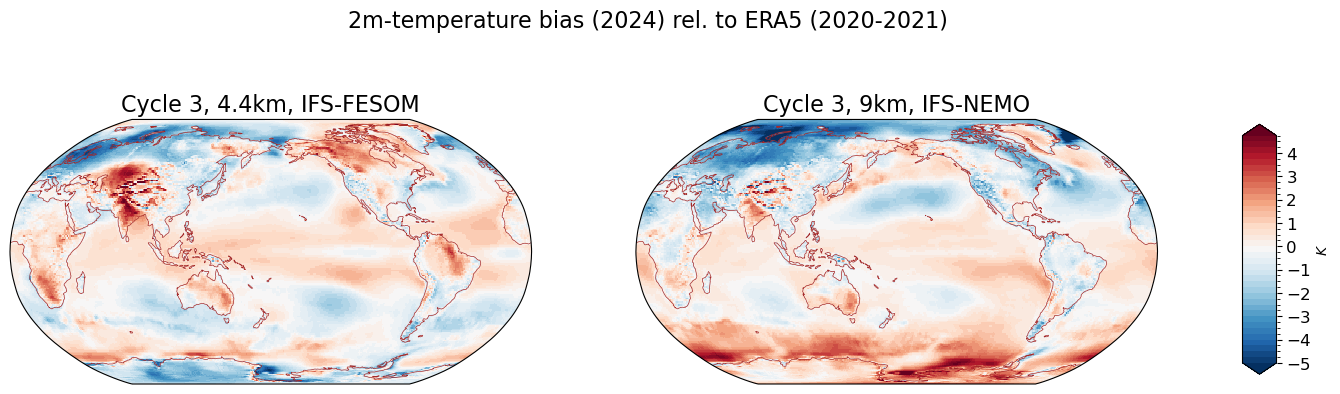

In [4]:
year = '2024'

fig, ax = plt.subplots(1, 2,figsize=(17,5), subplot_kw={'projection': ccrs.Robinson(central_longitude=180, globe=None)})
plotlevels=np.arange(-5,5,0.25)
small_fonts = 8

axs = ax.flatten()
model=cdo.remapcon('r360x180',input=ifs_4km_2t.to_dataset(),returnXDataset=True)['2t']
plotdata = model.sel(time=year).mean(dim='time') - era5_r360x180_ref_clim
plot = plotdata.plot(ax=axs[0],
              transform=ccrs.PlateCarree(),
              # colors='bone',
              colors='RdBu_r',
              linewidths=0.3,
              levels=plotlevels,
              add_colorbar=False,
                     )
axs[0].set_title('Cycle 3, 4.4km, IFS-FESOM',fontsize=16)

axs = ax.flatten()
model=cdo.remapcon('r360x180',input=ifs_9km_2t.to_dataset(),returnXDataset=True)['2t']
plotdata = model.sel(time=year).mean(dim='time') - era5_r360x180_ref_clim
plot = plotdata.plot(ax=axs[1],
              transform=ccrs.PlateCarree(),
              # colors='bone',
              colors='RdBu_r',
              linewidths=0.3,
              levels=plotlevels,
              add_colorbar=False,
                     )
axs[1].set_title('Cycle 3, 9km, IFS-NEMO',fontsize=16)


for axi in axs:
    axi.coastlines(color='brown',linewidth=0.5)

    

# common colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.02, 0.5]) # [left, bottom, width, height]
cbar = fig.colorbar(plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=small_fonts*1.5)
cbar.set_label('$K$')

fig.suptitle('2m-temperature bias ('+year+') rel. to ERA5 (2020-2021)',fontsize=16)

plt.savefig('figure_10.pdf')